In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [4]:
# Download S&P 500 front month futures data
sp500_futures_prices = yf.download('ES=F', auto_adjust=False)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [5]:
# Calculate logarithmic returns
# YOUR CODE HERE
log_returns = np.log(sp500_futures_prices / sp500_futures_prices.shift(1)).dropna()

In [15]:
# Calculate cumulative returns
# YOUR CODE HERE
cumulative_returns = np.exp(log_returns.cumsum())

In [16]:
# Calculate ongoing drawdown
# YOUR CODE HERE
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
# Fix: Ensure drawdowns is a 1D Series for plotting
drawdowns = drawdowns.squeeze()

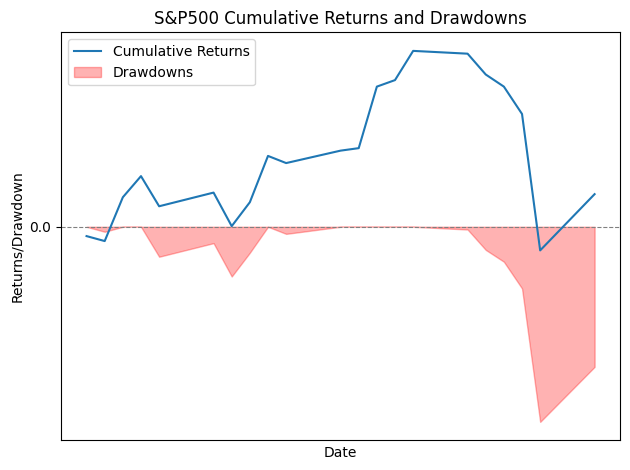

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots()
# Plotting the results
ax.plot(cumulative_returns - 1, label='Cumulative Returns')
ax.fill_between(drawdowns.index, drawdowns, label='Drawdowns', color='red', alpha=0.3)
# Setting x-axis major locator to each year and formatter
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Setting y-axis ticks every 20%
ax.yaxis.set_major_locator(MultipleLocator(0.2))
# Adding grid with vertical lines for each year
ax.grid(True, which='major', linestyle='--', color='grey')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Ensure date labels are visible
ax.legend()
ax.set_title('S&P500 Cumulative Returns and Drawdowns')
ax.set_xlabel('Date')
ax.set_ylabel('Returns/Drawdown')
fig.tight_layout()
plt.show()